<a href="https://colab.research.google.com/github/RaviGprec/Machine-Learning/blob/master/Yotaasys_assignement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 
import numpy as np

df = pd.read_csv("EVDATA358272088709954_2018-11-16_2018-11-17.csv",encoding = "utf-8")


In [2]:
df.head()

,TIMESTAMP,longitude,latitude,EVMGS,EVICO_Max,EVMGT,EVBMI_Min,EVSMA_MIN,EVSMA_MAX,EVMGR,EVHTP_Min,EVBMI_Latest,EVBAP_Max,EVIND,EVSMI_MIN,EVSOMA,EVBMI_Max,EVRER,EVHTP_Max,EVSOMI,EVPWA_MIN,EVHVS,EVICO_Min,EVDSE,EVBMA_Latest,EVBBV,EVBMA_Min,EVMGF,EVCOM_Min,EVSMI_MAX,EVBAP_Min,EVBCA,EVDDC,EVGSM,numsat,EVDRG,EVIGM_Latest,EVSOH,EVICR,EVIGM_Max,...,EVMCV_MIN,EVDR2,EVIRP,EVIRN,EVIRT_Min,EVBOA_MAX,EVICO_Latest,EVCLC,EVACE,EVACP,EVTRE,EVIRT_Max,EVACS,EVCCS,EVDOV,EVPSS,EVDOA,EVBOV_MAX,EVDI2,EVCST,EVDI1,EVIGS,EVVSP,EVCOM_Max,EVBMA_Max,hdop,EVVBT,EVIRT_Latest,EVBOV_MIN,EVHTR,EVHTP_AVG,EVBOA_MIN,EVODO,EVGPO,EVTRQ,EVIGC,IMEI,EVBOA_AVG,EVBFN,EVCFN
0,2018-11-16T07:07:24.415+05:30,77.257108,28.558857,16384,255,819.0,61.5,72.7,72.7,409.8,0,61.5,0,256,72.5,100.0,61.5,16383,0,100.0,0,10,184,0,64.0,59.5,64,409.8,253,72.6,0,0,1.4,0,9,92,69,100,1,255,...,3.835,0,1790,1800,253,16353.0,69,0,56.1,0.0,90,96,18.0,0,13.9,46.925,26,249.0,59,1,60,1,0.0,120,64.0,1.1,139,59,16290.0,0,0,227.0,906,10,819.2,30,358272088709954,512.25,0,0
1,2018-11-16T07:07:24.515+05:30,77.257108,28.558857,16384,255,819.0,61.5,72.7,72.7,409.8,0,61.5,0,256,72.5,100.0,61.5,16383,0,100.0,0,10,184,0,64.0,59.5,64,409.8,253,72.6,0,0,1.4,0,9,92,69,100,1,255,...,3.835,0,1790,1800,253,16353.0,69,0,56.1,0.0,90,96,18.0,0,13.9,46.925,26,249.0,59,1,60,1,0.0,120,64.0,1.1,139,59,16290.0,0,0,227.0,906,10,819.2,30,358272088709954,512.25,0,0
2,2018-11-16T07:07:24.615+05:30,77.257108,28.558857,16384,255,819.0,61.5,72.7,72.7,409.8,0,61.5,0,256,72.5,100.0,61.5,16383,0,100.0,0,10,184,0,64.0,59.5,64,409.8,253,72.6,0,0,1.4,0,9,92,69,100,1,255,...,3.835,0,1790,1800,253,16353.0,69,0,56.1,0.0,90,96,18.0,0,13.9,46.925,26,249.0,59,1,60,1,0.0,120,64.0,1.1,139,59,16290.0,0,0,227.0,906,10,819.2,30,358272088709954,512.25,0,0
3,2018-11-16T07:07:24.715+05:30,77.257108,28.558857,16384,255,819.0,61.5,72.7,72.7,409.8,0,61.5,0,256,72.5,100.0,61.5,16383,0,100.0,0,10,184,0,64.0,59.5,64,409.8,253,72.6,0,0,1.4,0,9,92,69,100,1,255,...,3.835,0,1790,1800,253,16353.0,69,0,56.1,0.0,90,96,18.0,0,13.9,46.925,26,249.0,59,1,60,1,0.0,120,64.0,1.1,139,59,16290.0,0,0,227.0,906,10,819.2,30,358272088709954,512.25,0,0
4,2018-11-16T07:07:24.815+05:30,77.257108,28.558857,16384,255,819.0,61.5,72.7,72.7,409.8,0,61.5,0,256,72.5,100.0,61.5,16383,0,100.0,0,10,184,0,64.0,59.5,64,409.8,253,72.6,0,0,1.4,0,9,92,69,100,1,255,...,3.835,0,1790,1800,253,16353.0,69,0,56.1,0.0,90,96,18.0,0,13.9,46.925,26,249.0,59,1,60,1,0.0,120,64.0,1.1,139,59,16290.0,0,0,227.0,906,10,819.2,30,358272088709954,512.25,0,0


In [0]:
df.describe

In [6]:
#df['EVVSP'].head()
df['EVVSP'].tail()

19995    74.1641
19996    74.1641
19997    74.1641
19998    74.1641
19999    74.1641
Name: EVVSP, dtype: float64

In [0]:
Y = df['EVVSP']


In [0]:
X = df.drop(['EVVSP'], axis = 1)

In [11]:
print(X.shape)
print(Y.shape)

(20000, 105)
(20000,)


In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 105 entries, TIMESTAMP to EVCFN
dtypes: float64(37), int64(64), object(4)
memory usage: 16.0+ MB


In [0]:
X.isnull().sum()/len(X.index)

In [18]:
X.columns[X.isna().any()].tolist()

[]

In [20]:
Y.isnull().any()

False

Its is clear that there is NO MISSING DATA

###Separating the Categorical and Continuous Columns

In [0]:
totalCols = X.columns
#
#

In [25]:
ContinuousCols = X._get_numeric_data().columns

print(ContinuousCols)
print(len(ContinuousCols))

Index(['longitude', 'latitude', 'EVMGS', 'EVICO_Max', 'EVMGT', 'EVBMI_Min',
       'EVSMA_MIN', 'EVSMA_MAX', 'EVMGR', 'EVHTP_Min',
       ...
       'EVHTP_AVG', 'EVBOA_MIN', 'EVODO', 'EVGPO', 'EVTRQ', 'EVIGC', 'IMEI',
       'EVBOA_AVG', 'EVBFN', 'EVCFN'],
      dtype='object', length=101)
101


In [27]:
CategoricalCols = list(set(totalCols) - set(ContinuousCols))

print(CategoricalCols)
print(len(CategoricalCols))

['EVVer', 'TIMESTAMP', 'trip_id', 'EVTmg']
4


Out of 105 features, 101 are Continuous and 4 are Categorical. Lets explore the Categorical data.

In [28]:
X['EVVer'].value_counts()

M1_POCEV.0    20000
Name: EVVer, dtype: int64

In [0]:
X['TIMESTAMP'].value_counts()

In [32]:
X['trip_id'].value_counts()

Trip not started    20000
Name: trip_id, dtype: int64

In [33]:
X['EVTmg'].value_counts()

P    20000
Name: EVTmg, dtype: int64

All the 4 categorical features are not useful for our model. Reason is TIMESTAMP is unique, remaining features contains only ONE value in them. So we can go and remove these features.

In [0]:
X = X.drop(['EVVer', 'TIMESTAMP', 'trip_id', 'EVTmg'], axis = 1)


In [35]:
print("No of features remaining in the X : ", X.shape[1])

No of features remaining in the X :  101


###Dropping the columns which have only ONE in them.

In [0]:

for col in ContinuousCols:
    if len(X[col].unique()) == 1:
        X = X.drop(col,axis=1)

In [44]:
X.shape[1]

66

Now we have 66 features to proceed next.

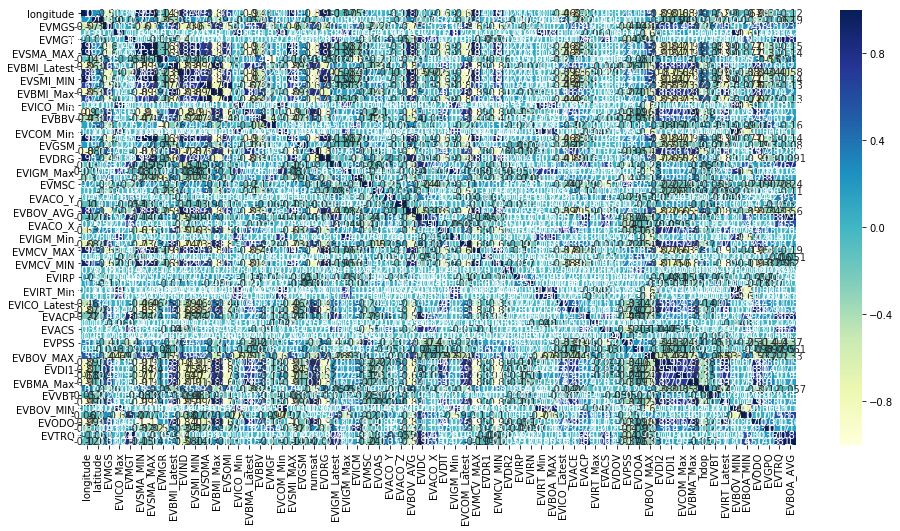

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,8))

# Heatmap
sns.heatmap(X.corr(), cmap="YlGnBu", annot=True)
plt.show()

##Applying PCA for reducing the shape of the X so that it is easy for the model to compute the result

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [0]:
pca = decomposition.PCA(n_components = 5)

X_scaled_pca = pca.fit_transform(X_scaled)

In [51]:
X_scaled_pca.shape

(20000, 5)

In [0]:
dataframe = pd.DataFrame.from_records(X_scaled_pca)

Above is the process of converting the result of PCA to a dataframe to view the data after reducing the shape of X

In [53]:
dataframe.head()

,0,1,2,3,4
0,9.079892,21.285051,6.749873,5.067093,6.03817
1,9.079892,21.285051,6.749873,5.067093,6.03817
2,9.079892,21.285051,6.749873,5.067093,6.03817
3,9.079892,21.285051,6.749873,5.067093,6.03817
4,9.079892,21.285051,6.749873,5.067093,6.03817


###Train And Test Splitting 

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dataframe, Y, test_size = 0.3, random_state = 0)


In [55]:
print("x_train: ",x_train.shape)
print("x_test : ",x_test.shape)
print("y_trian: ",y_train.shape)
print("y_test : ",y_test.shape)

x_train:  (14000, 5)
x_test :  (6000, 5)
y_trian:  (14000,)
y_test :  (6000,)


#Model Building 


##RandomForestRegressor

In [0]:
from sklearn.ensemble import RandomForestRegressor

# Running the random forest with default parameters.
rfc = RandomForestRegressor(n_estimators= 200)

In [57]:
rfc.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
predictions = rfc.predict(x_test)

In [61]:
rfc.score(x_train,y_train)

0.9999978241286445

The above result is R^2 value. It means, for Training data we got the R^2 = 99%  which is like 

It looks like OVERFIT. In fact, RandomForestClassifier/Regressor's drawback is "Overfit"

###R^2

In [65]:
from sklearn.metrics import r2_score,mean_squared_error


print("Testing R^2 : ", r2_score(y_test,predictions))

Testing R^2 :  0.9999929665599465


###Root Mean Square Error Calculation

In [67]:

print("RMSE : " ,np.sqrt(mean_squared_error(predictions,y_test)))

RMSE :  0.06585690736303966


Good result. RMSE is close to Zero

In [68]:
x_test.shape

(6000, 5)

###Calculating Adjusted R^2

In [71]:
r2 = r2_score(y_test,predictions)
N = x_test.shape[0] #No of Observations
P = x_test.shape[1] #No of Features

AdjR2 = 1 - (((1-r2)*(N-1))/(N-P-1))
print("Adjusted R^2 : ", AdjR2)

Adjusted R^2 :  0.9999929606928794


##Checking for Linear Regression assumptions before applying the building the model.

Text(0.5, 0, 'Errors')

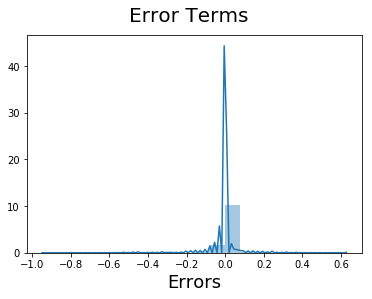

In [72]:
#Residuals should follow normality
fig = plt.figure()
sns.distplot((y_test-predictions), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

##Linear Regression Model

In [77]:
import statsmodels.api as sm

# Add a constant
x_train_lm = sm.add_constant(x_train)

# Create a first fitted model
lr = sm.OLS(y_train, x_train_lm).fit()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [78]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  EVVSP   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     4122.
Date:                Wed, 10 Jul 2019   Prob (F-statistic):               0.00
Time:                        08:18:19   Log-Likelihood:                -58492.
No. Observations:               14000   AIC:                         1.170e+05
Df Residuals:                   13994   BIC:                         1.170e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.8598      0.133    313.691      0.000      41.598      42.121
0             -3.6354      0.028   -130.235      0.000      -3.690      -3.581
1             -0.6484      0.045    -14.438      0.000      -0.736      -0.560
2              0.7865      0.049     16.008      0.000       0.690       0.883
3              3.0808      0.067     46.151      0.000       2.950       3.212
4             -2.5504      0.081    -31.586      0.000      -2.709      -2.392
==============================================================================
Omnibus:                      627.528   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              713.971
Skew:                          -0.541   Prob(JB):                    9.19e-156
Kurtosis:                       3.228   Cond. No.                         4.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
y_train_pred = lr.predict(x_train_lm)
x_test_lm = sm.add_constant(x_test)
y_test_pred = lr.predict(x_test_lm)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
##Training Residuals 
train_residuals = (y_train-y_train_pred)
test_residuals = (y_test-y_test_pred)

###R2

In [88]:
print("Training R2 : ",r2_score(y_train,y_train_pred))
print("Testing R2  : ",r2_score(y_test,y_test_pred))

Training R2 :  0.5956215416279598
Testing R2  :  0.6011710473964129


###Adjusted R2

In [91]:
print("Training Adjusted R^2: ",adjr2(r2_score(y_train,y_train_pred),x_train.shape[0],x_train.shape[1]))
print("Testing Adjusted R^2: ",adjr2(r2_score(y_test,y_test_pred),x_test.shape[0],x_test.shape[1]))

Training Adjusted R^2:  0.5954770588287701
Testing Adjusted R^2:  0.6008383572457592


In [0]:
def adjr2(r2,N,P):
  AdjR2 = 1 - (((1-r2)*(N-1))/(N-P-1))
  return AdjR2

R^2 and AdjR^2 are almost same

###RMSE

In [92]:
print("Training RMSE : " ,np.sqrt(mean_squared_error(y_train,y_train_pred)))
print("Testing RMSE : " ,np.sqrt(mean_squared_error(y_test,y_test_pred)))

Training RMSE :  15.78472694240749
Testing RMSE :  15.68233678380018


##Conclsion:

I've tried 2 models (**RandomForestRegressor, Linear Regression (OLS)**). Out these 2, **RandomForestRegressor worked better (score is 99%).** 99% is looks like Overfit but it is same for Both Training and Testing Data. we can test this against new Test Data and see whether is it giving similar score of around 99 if then it is the best otherwise we have to tune the Hyperparameters of RandomForestRegressor.

Note: if we want to test our model on new set of testing data then we have to apply the same PCA transformation as applied the given data. Once we are done the model building if we want to reverse the transformation PCA then we have to use inverse_transform(X), where X is original data before applying PCA.
